In [214]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

 
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [215]:
cntry_df = pd.read_csv(r"C:\Users\nitin\Downloads\Country-data.csv")
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [216]:
cntry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [217]:
#converting exports,health and imports into absolute figures instead of percentages of gdpp

cntry_df['exports'] = cntry_df['exports']*cntry_df['gdpp']/100
cntry_df['health'] = cntry_df['health']*cntry_df['gdpp']/100
cntry_df['imports'] = cntry_df['imports']*cntry_df['gdpp']/100


In [218]:
cntry_df.describe(percentiles=[0,.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


## EDA

In [219]:
cntry_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [220]:
df_num = cntry_df.drop("country", axis = 1)
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [221]:
num=df_num.columns
list(enumerate(num))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

In [222]:
df_num = df_num.astype(float)

In [223]:
num

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

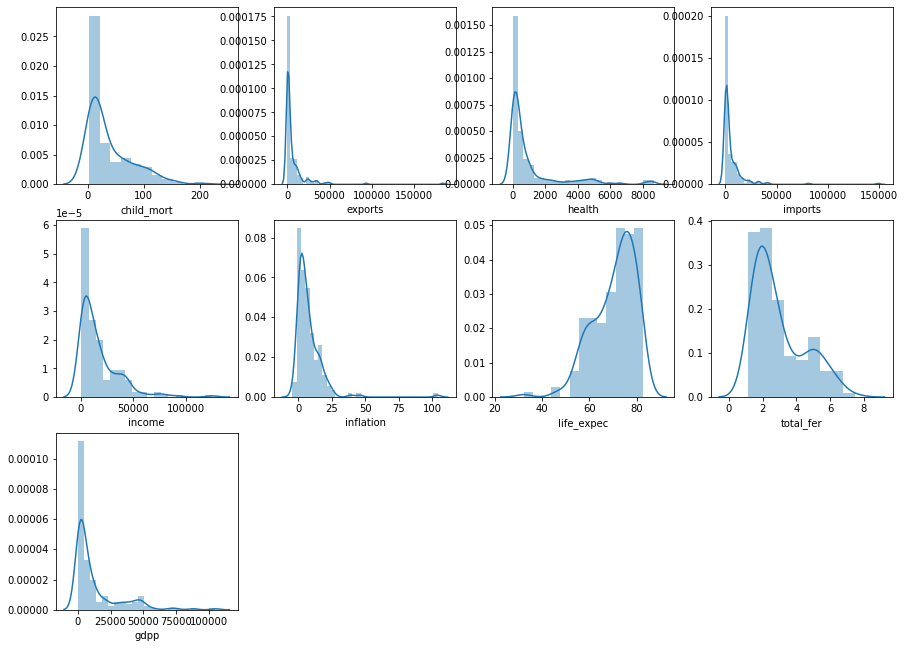

In [224]:
plt.figure(figsize = (15,15))
num = df_num.columns
for i in enumerate(num):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(df_num[i[1]])

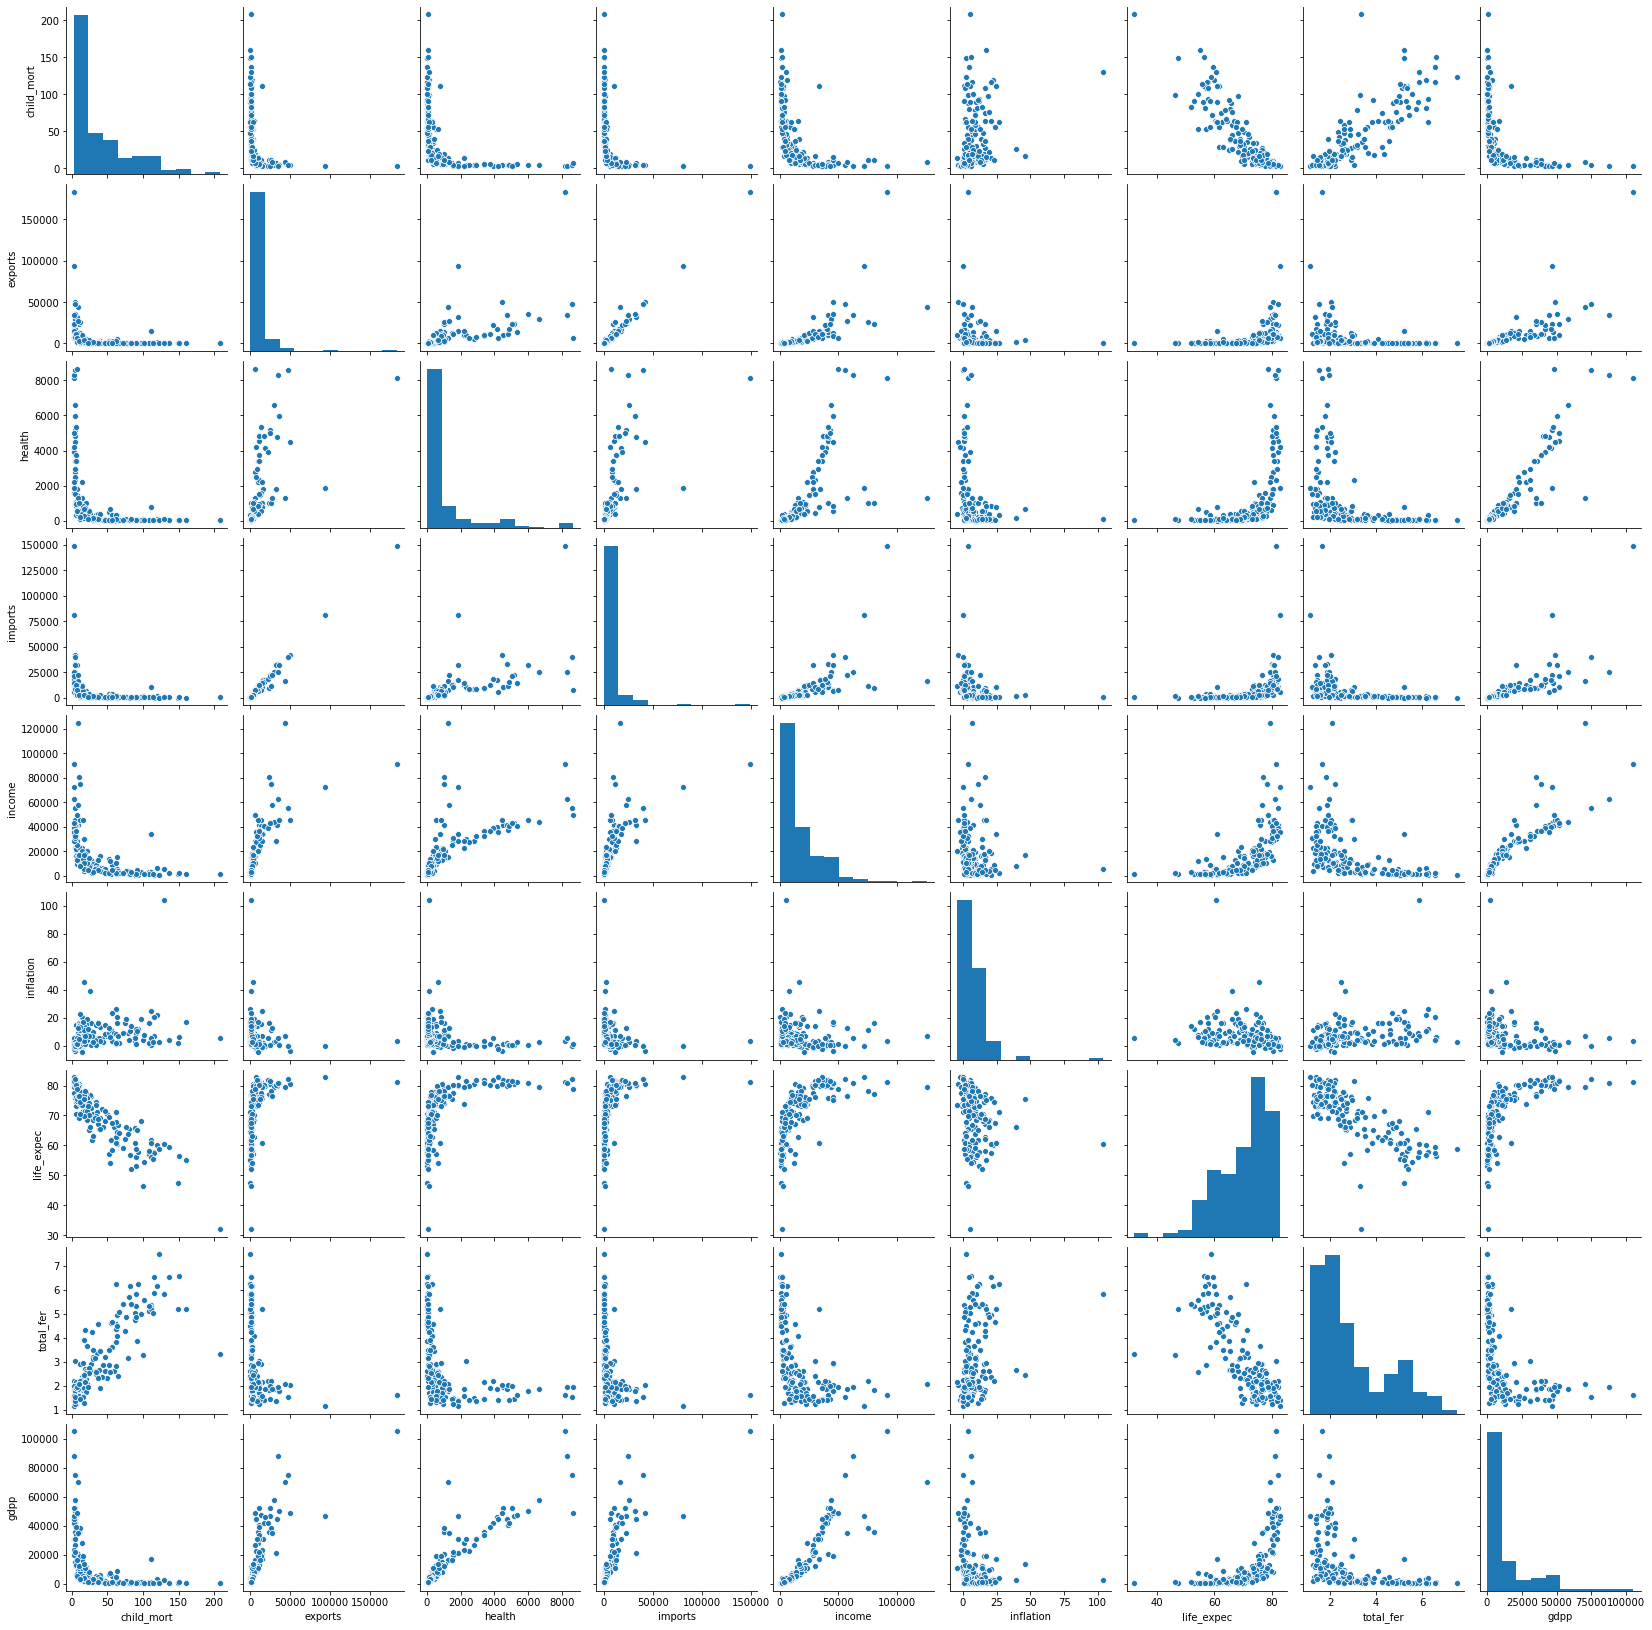

In [225]:
sns.pairplot(df_num)
plt.show()

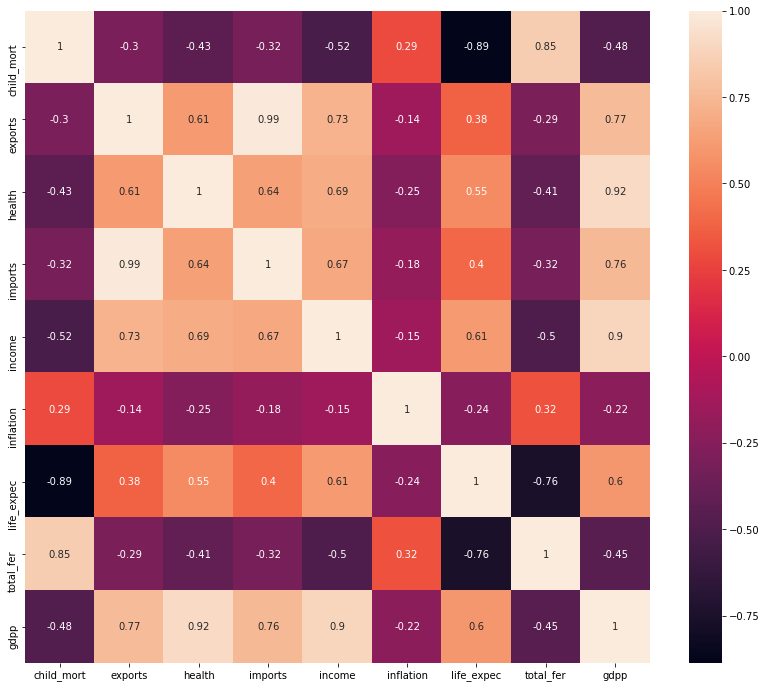

In [226]:
plt.figure(figsize = (14,12))
sns.heatmap(df_num.corr(),annot = True)
plt.show()

1. Strong positive correlation between child_mort and total_fer.
2. 'income' shows strong positive correlation to gdpp, exports, imports and health.
3. Negative correlation between total_fer and life_expec.
4. 'child_mort' negatively correlated with gdpp, income, health, imports, exports and life_expec.


## Outlier Treatment

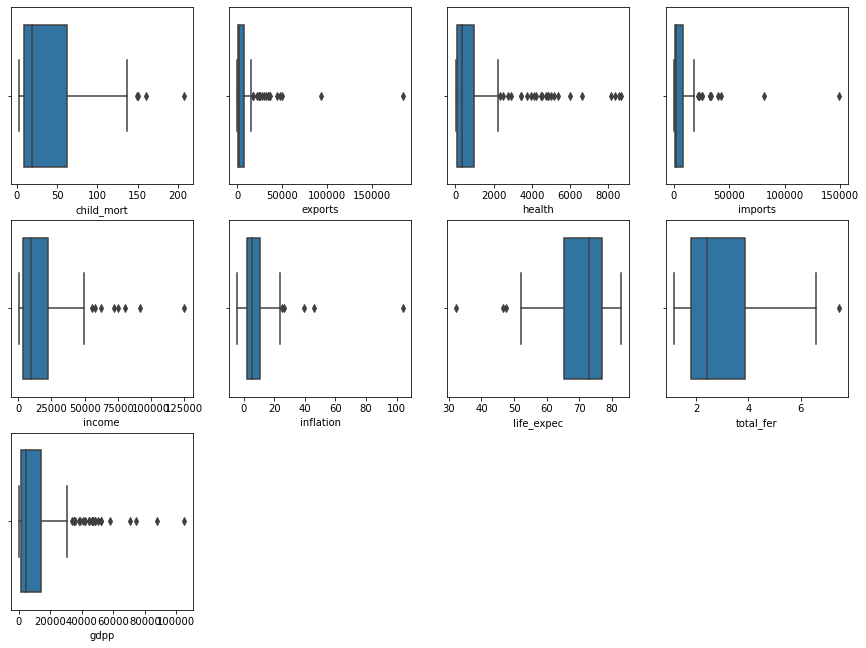

In [227]:
#getting a sense of outliers through boxplots

plt.figure(figsize = (15,15))
for i in enumerate(num):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x = i[1], data =df_num)

1. For child_mort,total_fer and inflation, leaving the upper range outliers as is, since it could indicate stronger need for aid.
2. For other columns, leaving lower range outliers as is, but the upper range outliers need to be treated

In [228]:
# using the 1.5xIQR rule to treat outliers

def outlier_treat(df, col):
    
    Q1 = df[col].quantile(0.25)

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    df.loc[(df[col] > higher_cap), col] = higher_cap
    df.loc[(df[col] < lower_cap), col] = lower_cap
    
    return df

In [229]:

df_num = outlier_treat(df_num, 'child_mort')
df_num = outlier_treat(df_num, 'exports')
df_num = outlier_treat(df_num, 'health')
df_num = outlier_treat(df_num, 'imports')
df_num = outlier_treat(df_num, 'income')
df_num = outlier_treat(df_num, 'inflation')
df_num = outlier_treat(df_num, 'life_expec')
df_num = outlier_treat(df_num, 'total_fer')
df_num = outlier_treat(df_num, 'gdpp')

In [230]:
df_num.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


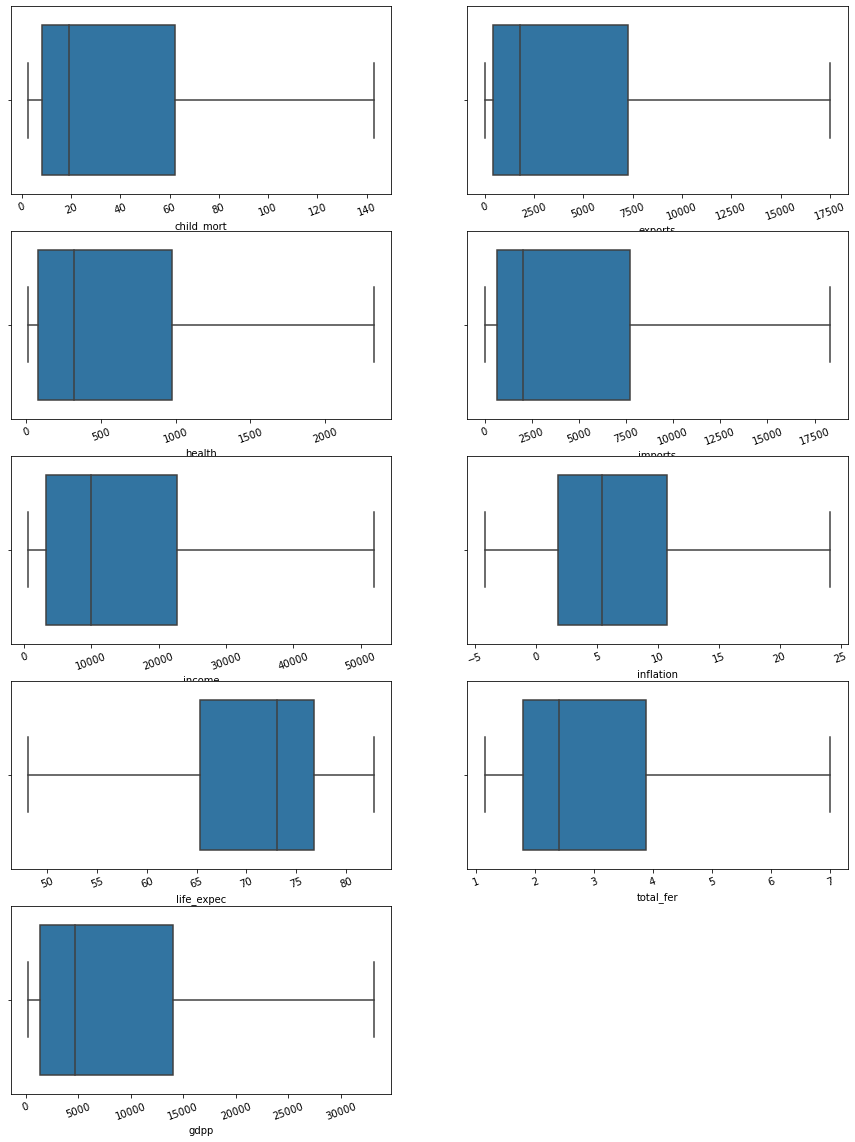

In [231]:
plt.figure(figsize=(15,20))

Feat_Col = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(Feat_Col): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(df_num[i[1]])
    plt.xticks(rotation = 20)

One may observe that outliers have been treated. 

## HOPKINS: Cluster Tendency

In [232]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [233]:
hopkins(df_num)

0.8539477375339383

## Scaling

In [234]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df_num)
df1

array([[ 1.36980194, -0.80056371, -0.79556251, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.55046422, -0.61314982, -0.51391972, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27129509, -0.51557561, -0.6160104 , ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37565738, -0.64788476, -0.73612924, ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.48533152, -0.74249447, -0.76323195, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.18455887, -0.71718267, -0.7406285 , ..., -2.19651829,
         1.63547189, -0.7679976 ]])

In [235]:
df1 = pd.DataFrame(df1)
df1.columns = df_num.columns
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


## Finding the best value of K

In [336]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(df1)
    score = silhouette_score(df1, km.labels_, metric='euclidean')
    print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.498
Silhouette Score: 0.434
Silhouette Score: 0.325
Silhouette Score: 0.327
Silhouette Score: 0.332
Silhouette Score: 0.311
Silhouette Score: 0.325
Silhouette Score: 0.307
Silhouette Score: 0.308


Max score occurs for k = 2, but it doesn't suit our functional needs, so we go ahead and choose k = 3.

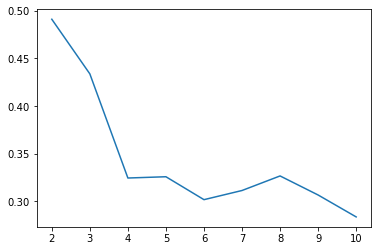

In [331]:


ss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])


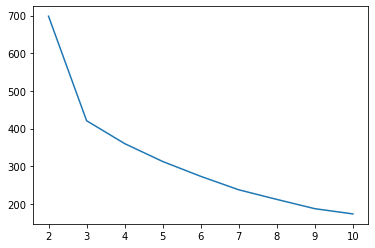

In [319]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

In [320]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [239]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [240]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [241]:
df_num['cluster_id'] = kmean.labels_

In [242]:
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [243]:
# count as per cluster id
df_num.cluster_id.value_counts()

2    78
0    48
1    41
Name: cluster_id, dtype: int64

## Plotting

Plotting for the 3 features mentioned in the problem statement.

1. gdpp
2. income
3. child_mort 

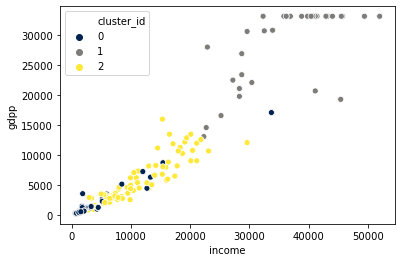

In [244]:
sns.scatterplot(x = 'income', y ='gdpp', hue = 'cluster_id', data =df_num, palette = 'cividis')

Follows a somewhat linear relationship intially but then diverges. cluster_id = 0 has a combination of low income and low gdpp.

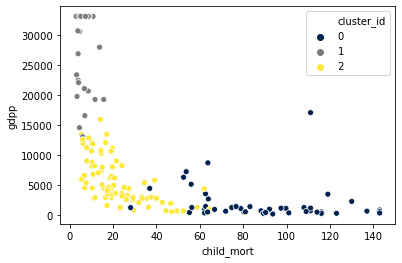

In [245]:
sns.scatterplot(x = 'child_mort', y ='gdpp', hue = 'cluster_id', data =df_num, palette = 'cividis')

cluster_id = 0 has high child mortality in combination with a low gdpp.

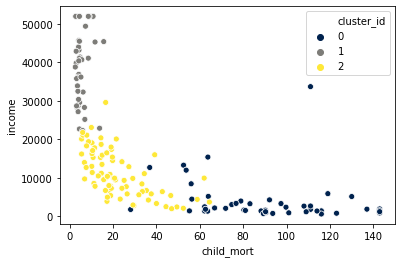

In [246]:
sns.scatterplot(x = 'child_mort', y ='income', hue = 'cluster_id', data =df_num, palette = 'cividis')

cluster_id = 0 has high child mortality in combination with a low income. 

## Cluster Profiling

_You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries._

In [247]:
df_num[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean()

,gdpp,income,child_mort
cluster_id,,,
0,1909.208333,3897.354167,89.620833
1,28969.512195,38988.780488,5.651220
2,5759.897436,11196.025641,22.591026


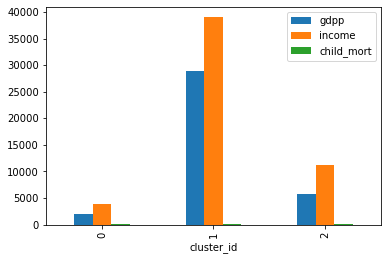

In [248]:
df_num[['gdpp', 'income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

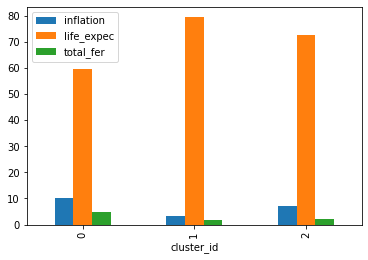

In [249]:
df_num[['inflation', 'life_expec','total_fer','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

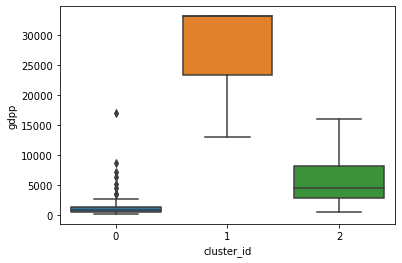

In [289]:
sns.boxplot(x = "cluster_id",y = "gdpp", data=df_num)
plt.show()

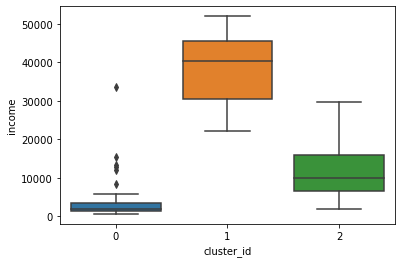

In [290]:
sns.boxplot(x = "cluster_id",y = "income", data=df_num)
plt.show()

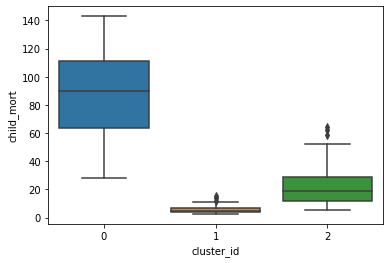

In [291]:
sns.boxplot(x = "cluster_id",y = "child_mort", data=df_num)
plt.show()

## Based on the above box plots, we can conclude that cluster_id = 0 is in most need of aid. 

In [250]:
df2 = pd.concat([df_num,cntry_df[["country"]]],axis=1)

In [284]:
c1 = df2[df2['cluster_id']==0]
c1.sort_values(by = ['income', 'gdpp','child_mort'], ascending = [True,True, False]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
37,116.000,137.2740,26.4194,165.664,609.0,20.80,57.50,6.5400,334.0,0,"Congo, Dem. Rep."
88,89.300,62.4570,38.5860,302.802,700.0,5.47,60.80,5.0200,327.0,0,Liberia
26,93.600,20.6052,26.7960,90.552,764.0,12.30,57.70,6.2600,231.0,0,Burundi
112,123.000,77.2560,17.9568,170.868,814.0,2.55,58.80,7.0075,348.0,0,Niger
31,142.875,52.6280,17.7508,118.190,888.0,2.01,48.05,5.2100,446.0,0,Central African Republic
106,101.000,131.9850,21.8299,193.578,918.0,7.64,54.50,5.5600,419.0,0,Mozambique
94,90.500,104.6520,30.2481,160.191,1030.0,12.10,53.10,5.3100,459.0,0,Malawi
63,109.000,196.3440,31.9464,279.936,1190.0,16.10,58.00,5.3400,648.0,0,Guinea
150,90.300,196.1760,37.3320,279.624,1210.0,1.18,58.70,4.8700,488.0,0,Togo
132,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,0,Sierra Leone


In [286]:
c1.count()

child_mort    48
exports       48
health        48
imports       48
income        48
inflation     48
life_expec    48
total_fer     48
gdpp          48
cluster_id    48
country       48
dtype: int64

## One may observe that there are 48 countries that are most in need of aid according to K-means. 

In [252]:
c2 = df2[df2['cluster_id']==1]

In [253]:
c2.sort_values(by = ['income', 'gdpp',"child_mort"], ascending = [True, False,True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
67,6.0,10715.80,960.23000,10021.5000,22300.0,2.330,74.5,1.25,13100.0,1,Hungary
51,4.5,10964.60,880.38000,10030.2000,22700.0,1.740,76.0,1.72,14600.0,1,Estonia
10,13.8,9800.00,2209.20000,12236.0000,22900.0,-0.393,73.8,1.86,28000.0,1,Bahamas
134,7.0,12665.80,1459.14000,12914.8000,25200.0,0.485,75.5,1.43,16600.0,1,Slovak Republic
122,3.9,6727.50,2324.54675,8415.0000,27200.0,0.643,79.8,1.39,22500.0,1,Portugal
98,6.8,17524.29,1825.15000,18338.6775,28300.0,3.830,80.3,1.36,21100.0,1,Malta
43,3.4,13068.00,1560.24000,12454.2000,28300.0,-1.430,77.5,1.51,19800.0,1,Czech Republic
60,3.9,5944.90,2324.54675,8258.3000,28700.0,0.673,80.4,1.48,26900.0,1,Greece
135,3.2,15046.20,2201.94000,14718.6000,28700.0,-0.987,79.5,1.57,23400.0,1,Slovenia
74,4.6,10710.00,2324.54675,10067.4000,29600.0,1.770,81.4,3.03,30600.0,1,Israel


In [254]:
c3 = df2[df2['cluster_id']==2]

In [255]:
c3.sort_values(by = ['income', 'gdpp',"child_mort"], ascending = [True, True,False]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
109,47.0,56.71360,31.0800,215.488000,1990.0,15.10,68.3,2.61,592.0,2,Nepal
146,52.4,109.96200,44.1324,432.468000,2110.0,12.50,69.6,3.51,738.0,2,Tajikistan
12,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,2,Bangladesh
27,44.4,425.22600,44.6448,467.670000,2520.0,3.12,66.1,2.88,786.0,2,Cambodia
83,29.6,454.08000,54.3840,718.960000,2790.0,10.00,68.5,3.10,880.0,2,Kyrgyz Republic
162,29.2,1384.02000,155.9250,1565.190000,2950.0,2.62,63.0,3.50,2970.0,2,Vanuatu
101,40.0,672.10000,406.1200,2316.600000,3340.0,3.80,65.4,3.46,2860.0,2,"Micronesia, Fed. Sts."
107,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,2,Myanmar
102,17.2,638.96000,190.7100,1279.550000,3910.0,11.10,69.7,1.27,1630.0,2,Moldova
161,36.3,437.46000,80.1780,393.300000,4240.0,16.50,68.8,2.34,1380.0,2,Uzbekistan


## Hierarchical Clustering

In [256]:
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [257]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


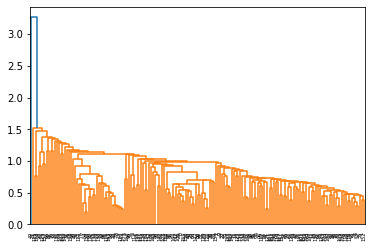

In [258]:
#single linkage
mergings = linkage(df1, method = "single", metric = "euclidean")
dendrogram(mergings)
plt.show()

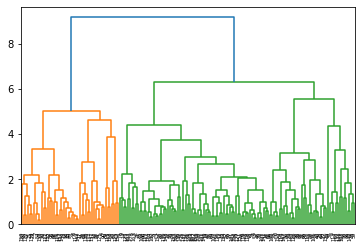

In [259]:
# complete linkage 
mergings = linkage(df1, method = "complete", metric = "euclidean")
dendrogram(mergings)
plt.show()

In [260]:
cut_tree(mergings, n_clusters = 3).shape

(167, 1)

In [261]:
cluster_labels= cut_tree(mergings, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [262]:
df_num["cluster_labels"] = cluster_labels
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,2


In [287]:
df_num.cluster_labels.value_counts()

1    75
2    49
0    43
Name: cluster_labels, dtype: int64

## One may observe that there 43 countries in cluster_label = 0

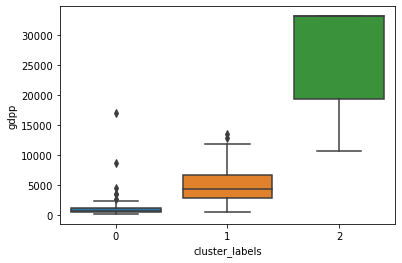

In [263]:
sns.boxplot(x = "cluster_labels",y = "gdpp", data=df_num)
plt.show()

cluster_label = 0 has the least gdpp

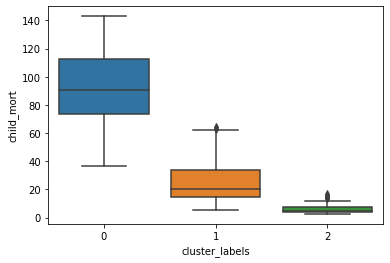

In [264]:
sns.boxplot(x = "cluster_labels",y = "child_mort", data=df_num)
plt.show()

cluster_label = 0 has the most child mortality.

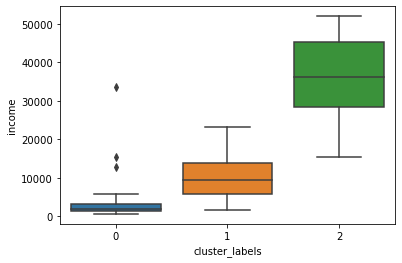

In [265]:
sns.boxplot(x = "cluster_labels",y = "income", data=df_num)
plt.show()

cluster_label = 0 has the least income.

##  Based on the plot above and count taken earlier, one may observe that there are 43 countries that are most in need of aid according to Hirarchical clustering.

In [266]:
Cluster_gdpp=pd.DataFrame(df_num.groupby(["cluster_id"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(df_num.groupby(["cluster_id"]).child_mort.mean())
Cluster_exports=pd.DataFrame(df_num.groupby(["cluster_id"]).exports.mean())
Cluster_income=pd.DataFrame(df_num.groupby(["cluster_id"]).income.mean())
Cluster_health=pd.DataFrame(df_num.groupby(["cluster_id"]).health.mean())
Cluster_imports=pd.DataFrame(df_num.groupby(["cluster_id"]).imports.mean())
Cluster_inflation=pd.DataFrame(df_num.groupby(["cluster_id"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(df_num.groupby(["cluster_id"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(df_num.groupby(["cluster_id"]).total_fer.mean())

In [267]:
df3 = pd.concat([Cluster_gdpp,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

In [268]:
df3

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
cluster_id,,,,,,,,,
0,1909.208333,89.620833,3897.354167,879.063521,114.821765,827.028771,10.183646,59.615625,4.982031
1,28969.512195,5.651220,38988.780488,13652.595610,1928.315171,13444.810488,3.235171,79.514634,1.799756
2,5759.897436,22.591026,11196.025641,2368.948699,372.152826,2608.557963,7.159090,72.810256,2.293590


In [269]:
Cluster_gdpp2=pd.DataFrame(df_num.groupby(["cluster_labels"]).gdpp.mean())
Cluster_child_mort2=pd.DataFrame(df_num.groupby(["cluster_labels"]).child_mort.mean())
Cluster_exports2=pd.DataFrame(df_num.groupby(["cluster_labels"]).exports.mean())
Cluster_income2=pd.DataFrame(df_num.groupby(["cluster_labels"]).income.mean())
Cluster_health2=pd.DataFrame(df_num.groupby(["cluster_labels"]).health.mean())
Cluster_imports2=pd.DataFrame(df_num.groupby(["cluster_labels"]).imports.mean())
Cluster_inflation2=pd.DataFrame(df_num.groupby(["cluster_labels"]).inflation.mean())
Cluster_life_expec2=pd.DataFrame(df_num.groupby(["cluster_labels"]).life_expec.mean())
Cluster_total_fer2=pd.DataFrame(df_num.groupby(["cluster_labels"]).total_fer.mean())

In [270]:
df4 = pd.concat([Cluster_gdpp2,Cluster_child_mort2,Cluster_income2,Cluster_exports2,Cluster_health2,
                Cluster_imports2,Cluster_inflation2,Cluster_life_expec2,Cluster_total_fer2], axis=1)

In [271]:
df4.head()

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
cluster_labels,,,,,,,,,
0,1628.883721,94.158140,3483.790698,791.381605,86.116644,675.739326,10.736163,59.747674,5.162500
1,4938.293333,25.789333,9931.466667,1852.959180,325.354792,2101.784148,7.596920,71.596000,2.423200
2,26290.816327,6.379592,36004.897959,12525.063673,1744.809429,12402.276122,3.029429,78.816327,1.797959


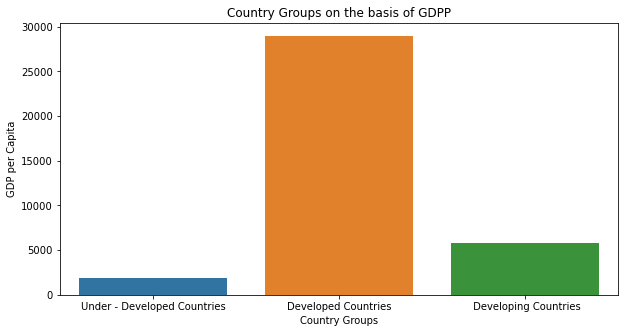

In [272]:
fig = plt.figure(figsize = (10,5))
df3.rename(index={0: 'Under - Developed Countries'},inplace = True)
df3.rename(index={1: 'Developed Countries'},inplace = True)
df3.rename(index={2: ' Developing Countries'},inplace = True)
s=sns.barplot(x=df3.index,y='gdpp',data=df3)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups on the basis of GDPP')
plt.show()

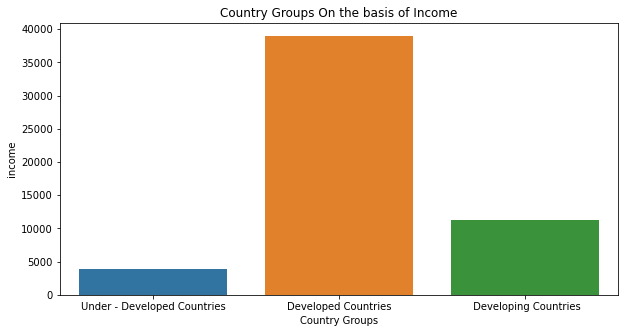

In [273]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x=df3.index,y='income',data=df3)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income')
plt.show()

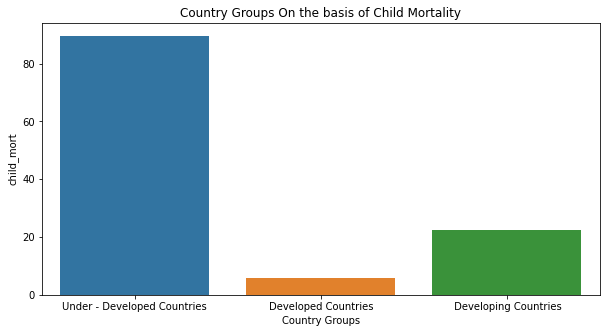

In [274]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x=df3.index,y='child_mort',data=df3)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child Mortality')
plt.show()

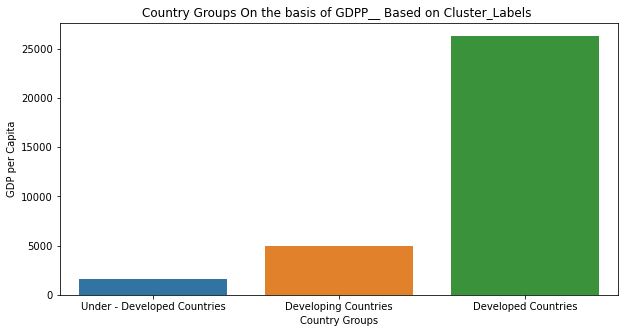

In [275]:
fig = plt.figure(figsize = (10,5))
df4.rename(index={0: 'Under - Developed Countries'},inplace = True)
df4.rename(index={1: 'Developing Countries'},inplace = True)
df4.rename(index={2: 'Developed Countries'},inplace = True)
s=sns.barplot(x=df4.index,y='gdpp',data=df4)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP__ Based on Cluster_Labels ')
plt.show()

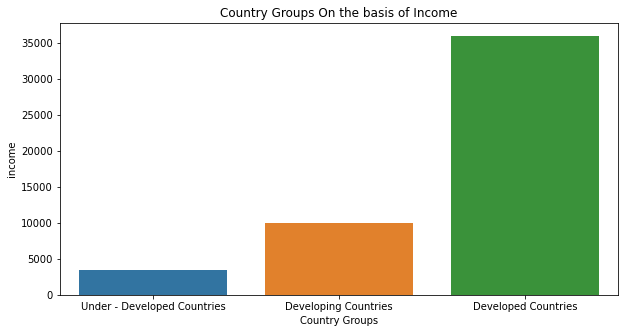

In [276]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x=df4.index,y='income',data=df4)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income')
plt.show()

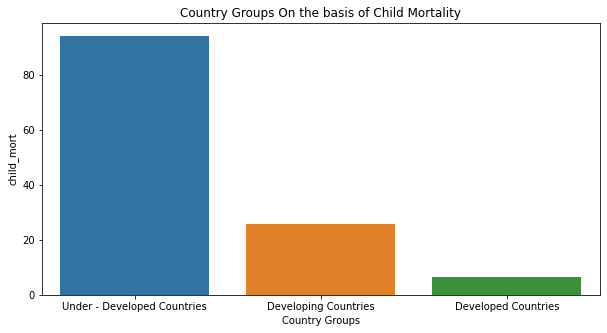

In [277]:
fig = plt.figure(figsize = (10,5))
sns.barplot(x=df4.index,y='child_mort',data=df4)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child Mortality')
plt.show()

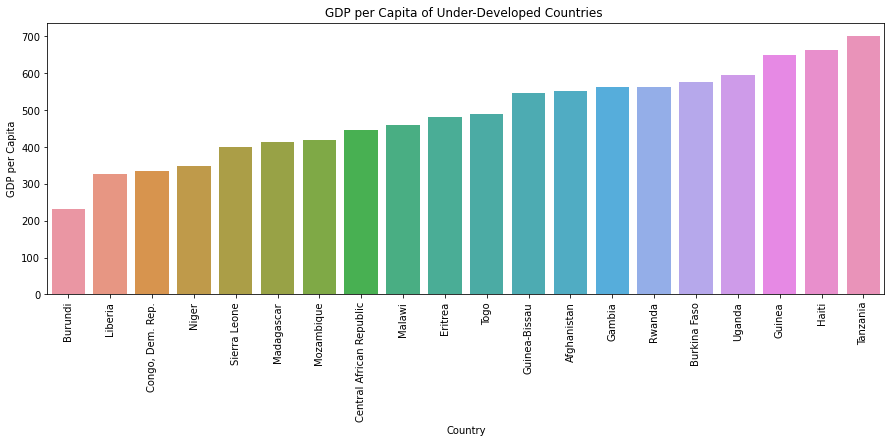

In [299]:
fig = plt.figure(figsize = (15,5))
s=sns.barplot(x='country',y='gdpp',data=df2[df_num["cluster_id"]==0].sort_values(by=["gdpp"]).head(20))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of Under-Developed Countries ')
plt.show()

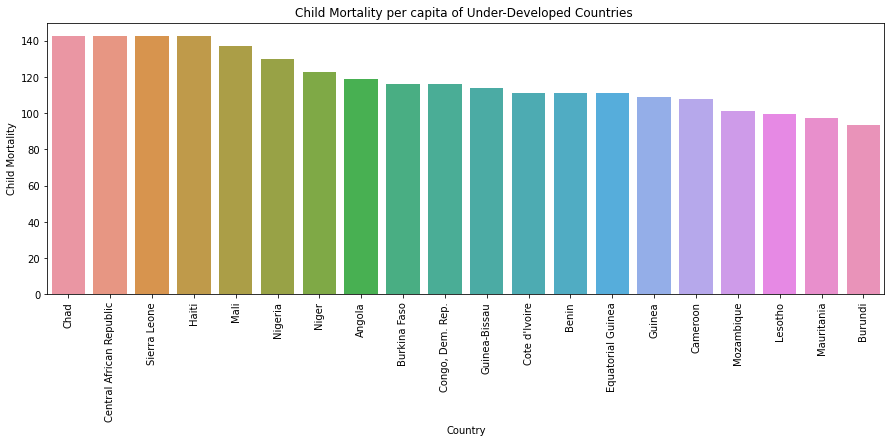

In [303]:
fig = plt.figure(figsize = (15,5))
s=sns.barplot(x='country',y='child_mort',data=df2[df_num["cluster_id"]== 0].sort_values(by=["child_mort"],ascending = False).head(20))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child Mortality', fontsize=10)
plt.title('Child Mortality per capita of Under-Developed Countries ')
plt.show()

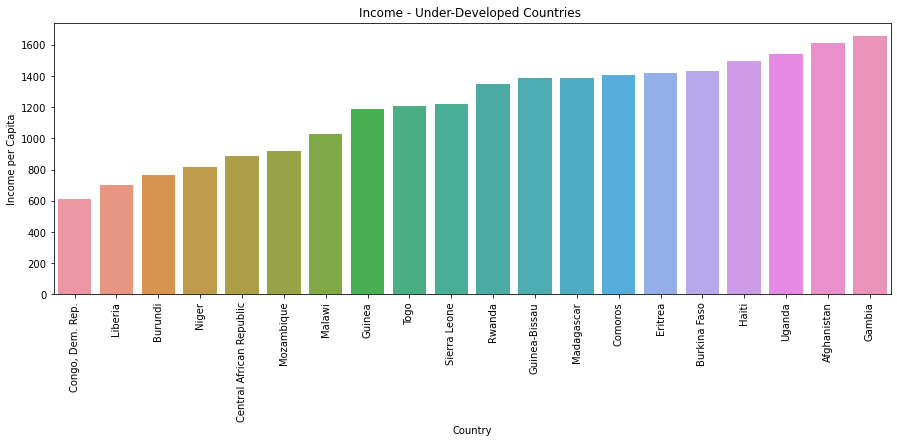

In [301]:
fig = plt.figure(figsize = (15,5))
s=sns.barplot(x='country',y='income',data=df2[df_num["cluster_id"]==0].sort_values(by=["income"]).head(20))
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Income per Capita', fontsize=10)
plt.title('Income - Under-Developed Countries ')
plt.show()

In [282]:
aid_cntry = df2[df2['cluster_id']==0].sort_values(by = ["child_mort",'income', 'gdpp'], ascending = [False,True, True])

In [304]:
aid_cntry.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
31,142.875,52.6280,17.7508,118.190,888.0,2.010,48.05,5.2100,446.0,0,Central African Republic
132,142.875,67.0320,52.2690,137.655,1220.0,17.200,55.00,5.2000,399.0,0,Sierra Leone
66,142.875,101.2860,45.7442,428.314,1500.0,5.450,48.05,3.3300,662.0,0,Haiti
32,142.875,330.0960,40.6341,390.195,1930.0,6.390,56.50,6.5900,897.0,0,Chad
97,137.000,161.4240,35.2584,248.508,1870.0,4.370,59.50,6.5500,708.0,0,Mali
113,130.000,589.4900,118.1310,405.420,5150.0,24.160,60.50,5.8400,2330.0,0,Nigeria
112,123.000,77.2560,17.9568,170.868,814.0,2.550,58.80,7.0075,348.0,0,Niger
3,119.000,2199.1900,100.6050,1514.370,5900.0,22.400,60.10,6.1600,3530.0,0,Angola
37,116.000,137.2740,26.4194,165.664,609.0,20.800,57.50,6.5400,334.0,0,"Congo, Dem. Rep."
25,116.000,110.4000,38.7550,170.200,1430.0,6.810,57.90,5.8700,575.0,0,Burkina Faso


Bsed on multiple bad indicators, countries most in need of aid are, Congo Dem. Rep, Central African Republic, Sierra Leone, Guinea –Bissau, Burkina Faso, Niger, Burundi, Mozambique.